<a href="https://colab.research.google.com/github/natarajankrishna/projects/blob/main/lithium_battery_RUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Neel-Dandiwala/Lithium-Batteries-RUL-ANN/main/Input%20n%20Capacity.csv'
dataset = pd.read_csv(url)
dataset = dataset.drop(labels=['SampleId'], axis=1)


In [ ]:
data = dataset[~dataset.isin(['?'])]
data = data.dropna(axis=0)
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


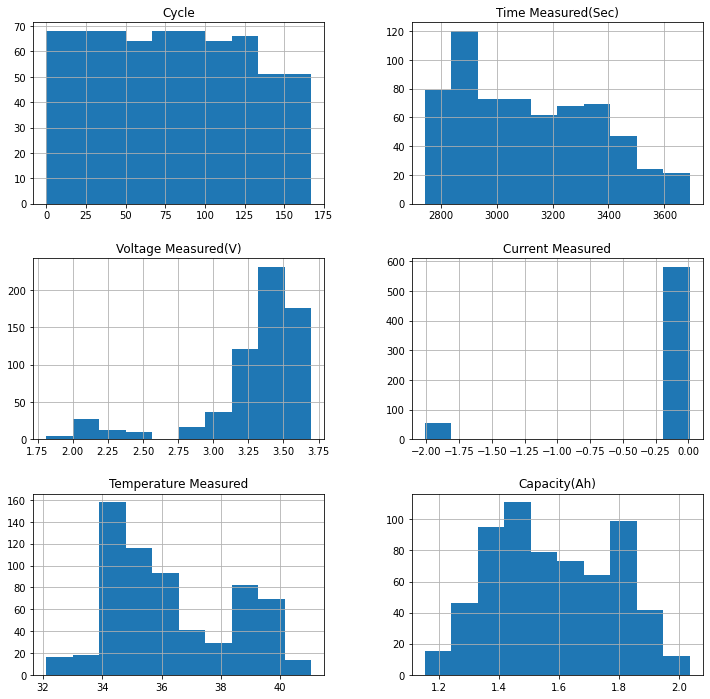

In [ ]:
data.hist(figsize = (12, 12))
plt.show()

<AxesSubplot:title={'center':'Features Standard Deviation'}>

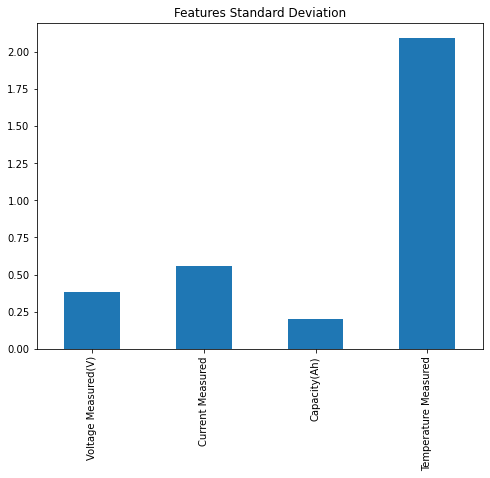

In [ ]:
features=["Voltage Measured(V)","Current Measured","Capacity(Ah)","Temperature Measured"]
data[features].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

In [ ]:
X = np.array(data.iloc[:,0:5].values)
y = np.array(data.iloc[:,5].values)
X


array([[ 0.00000000e+00,  3.69023400e+03,  3.27716998e+00,
        -6.52835100e-03,  3.42308528e+01],
       [ 0.00000000e+00,  3.69023400e+03,  2.47576776e+00,
        -2.00943589e+00,  3.91629865e+01],
       [ 0.00000000e+00,  3.69023400e+03,  3.06211271e+00,
        -1.43329900e-03,  3.73384785e+01],
       ...,
       [ 1.67000000e+02,  2.82039000e+03,  3.58993739e+00,
        -5.83347000e-04,  3.44059205e+01],
       [ 1.67000000e+02,  2.82039000e+03,  3.69180898e+00,
        -3.12712900e-03,  3.21923241e+01],
       [ 1.67000000e+02,  2.82039000e+03,  3.38385665e+00,
        -9.84538000e-04,  3.78516025e+01]])

In [ ]:
y

array([1.85648742, 2.03533759, 1.89105229, 1.85500452, 1.84632725,
       2.02514025, 1.88063703, 1.84319553, 1.83534919, 2.01332637,
       1.88066267, 1.83960184, 1.83526253, 2.01328467, 1.8807709 ,
       1.8306736 , 1.83464551, 2.00052834, 1.87945087, 1.83270021,
       1.83566166, 2.01389908, 1.88070035, 1.82852889, 1.83514614,
       2.01310111, 1.87993525, 1.82120119, 1.82575679, 1.96878983,
       1.88150881, 1.81517001, 1.82477385, 1.96816618, 1.86969079,
       1.80429805, 1.82461327, 1.95723079, 1.87005238, 1.82310023,
       1.82461955, 1.94559915, 1.87004424, 1.81212535, 1.81420194,
       1.9347505 , 1.8596519 , 1.80469164, 1.81375216, 1.92327995,
       1.85907466, 1.79084435, 1.81344049, 1.91188993, 1.85900846,
       1.78347072, 1.802598  , 1.90106671, 1.85936226, 1.78093861,
       1.8021069 , 1.889199  , 1.85873555, 1.77120904, 1.8025795 ,
       1.87827837, 1.84781729, 1.7686304 , 1.80306831, 1.86756972,
       1.84852529, 1.75363048, 1.80277763, 1.86758926, 1.84837

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.3)

In [ ]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(445, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(7, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(3,kernel_initializer='uniform', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error','accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=1)

Epoch 1/10
445/445 [==============================] - 2s 2ms/step - loss: 0.2105 - mean_absolute_error: 0.4581 - accuracy: 0.9865 - val_loss: 0.1751 - val_mean_absolute_error: 0.4183 - val_accuracy: 0.9948
Epoch 2/10
445/445 [==============================] - 1s 2ms/step - loss: 0.1503 - mean_absolute_error: 0.3867 - accuracy: 0.9865 - val_loss: 0.1265 - val_mean_absolute_error: 0.3553 - val_accuracy: 0.9948
Epoch 3/10
445/445 [==============================] - 1s 2ms/step - loss: 0.1116 - mean_absolute_error: 0.3322 - accuracy: 0.9865 - val_loss: 0.0951 - val_mean_absolute_error: 0.3076 - val_accuracy: 0.9948
Epoch 4/10
445/445 [==============================] - 1s 2ms/step - loss: 0.0863 - mean_absolute_error: 0.2909 - accuracy: 0.9865 - val_loss: 0.0741 - val_mean_absolute_error: 0.2708 - val_accuracy: 0.9948
Epoch 5/10
445/445 [==============================] - 1s 2ms/step - loss: 0.0690 - mean_absolute_error: 0.2585 - accuracy: 0.9865 - val_loss: 0.0594 - val_mean_absolute_error: 

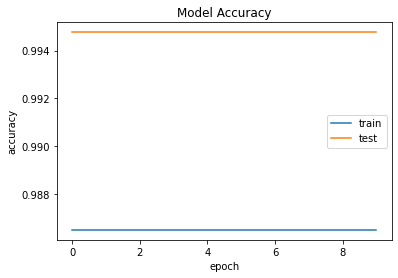

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


Text(0.5, 1.0, 'RUL Prediction')

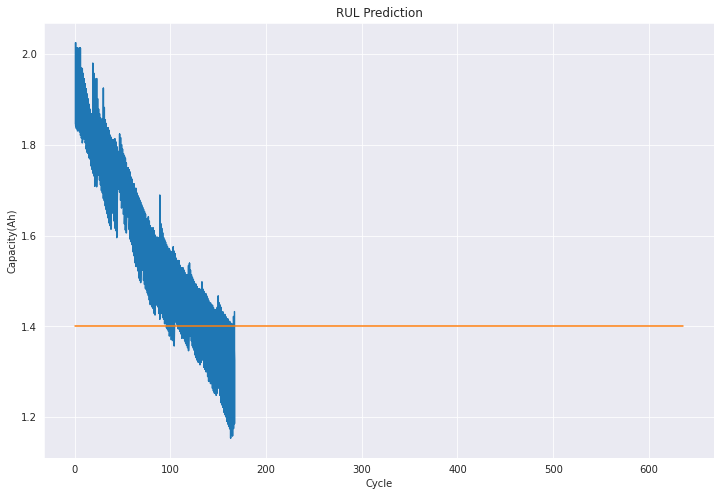

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = data.loc[(data['Cycle']>=1),['Cycle','Capacity(Ah)']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['Cycle'], plot_df['Capacity(Ah)'])

plt.plot([0.,len(data)], [1.4, 1.4])
plt.ylabel('Capacity(Ah)')

adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Cycle')
plt.title('RUL Prediction')

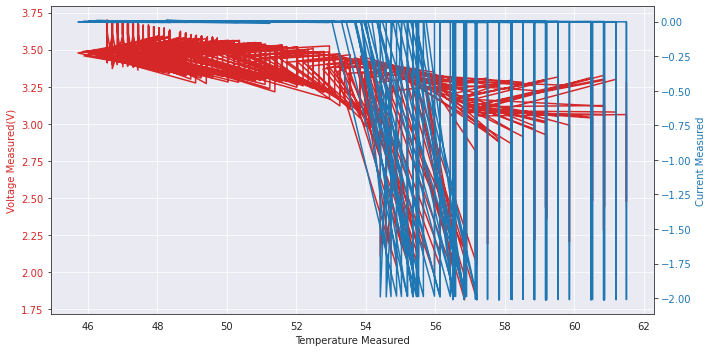

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
sns.set_style("white")
plot_df= data.loc[(data['Cycle']==1),['Temperature Measured','Current Measured']]
plot_df1 = data.loc[(data['Cycle']==1),['Temperature Measured','Voltage Measured(V)']]

color = 'tab:red'
ax1.set_xlabel('Temperature Measured')
ax1.set_ylabel('Voltage Measured(V)', color=color)
ax1.plot(data['Time Measured(Sec)']/60, data['Voltage Measured(V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Current Measured', color=color) 
ax2.plot(data['Time Measured(Sec)']/60, data['Current Measured'],'-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  
plt.show()

Text(0.5, 1.0, 'Discharge')

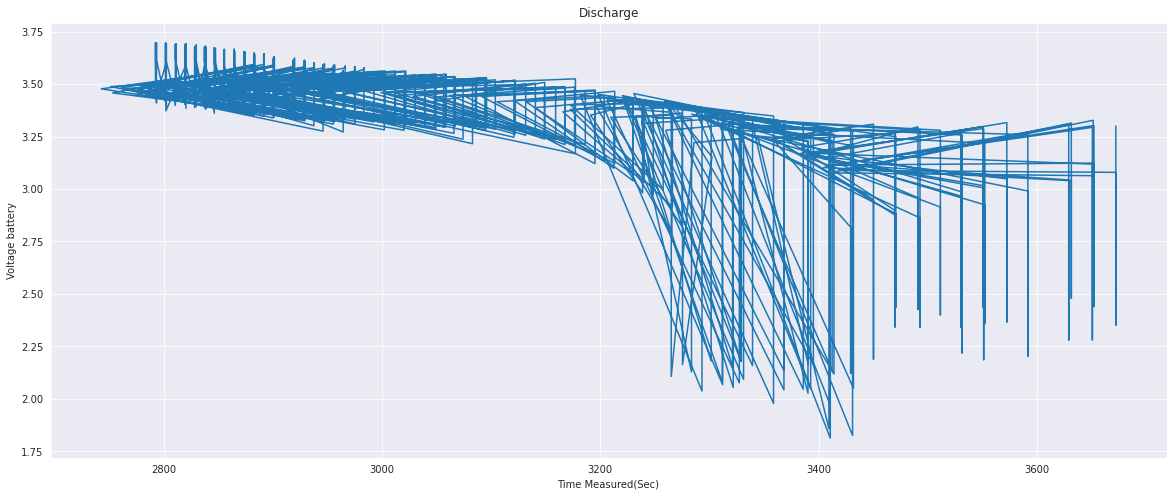

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = data.loc[(data['Cycle']>=1),['Time Measured(Sec)','Voltage Measured(V)']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['Time Measured(Sec)'], plot_df['Voltage Measured(V)'])
plt.ylabel('Voltage battery')

adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time Measured(Sec)')
plt.title('Discharge')